In [1]:
# load libraries
library(susieR)
# library(Matrix)
library(ggplot2)
# library(qvalue)

In [2]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [3]:
Marcs_dir = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/")

In [4]:
myfile0 = paste0(Marcs_dir,"results_mj/TestOut/qtl_results_all.txt.gz")
# df0 = read.csv(gzfile(myfile0), sep="\t")
nrow(df0)
head(df0,2)

[1] 19131741

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000221909,7_99141373_G_A,0.0288737,0.05597193,0.02561291,0.4631133,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99141373,A,1,0.07575758,0.4360553
ENSG00000221909,7_99024636_C_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99024636,T,1,0.10606061,0.5939258


In [5]:
# saved input files for gene ENSG00000100058
y_df = read.csv(paste0(revision_folder,"example_y_ENSG00000100058.csv"), row.names=1)
G_df = read.csv(paste0(revision_folder,"example_G_ENSG00000100058.csv"), row.names=1)
C_df = read.csv(paste0(revision_folder,"example_C.csv"), row.names=1)

In [6]:
# single-cell expression (phenotype, output)
dim(y_df)
head(y_df,2)

[1] 33964     1

,ENSG00000100058_CRYBB2P1
0,-0.3125793
1,-1.6862820


In [7]:
# Genotypes (cis window) - expanded
dim(G_df)
head(G_df,2)

[1] 33964  1078

,X22_25744472_C_T,X22_25744915_T_C,X22_25745441_G_A,X22_25746593_C_T,X22_25746647_C_T,X22_25746766_C_G,X22_25746838_C_G,X22_25747123_G_A,X22_25747160_G_A,X22_25747716_A_G,...,X22_26012979_G_C,X22_26012999_A_G,X22_26013350_C_T,X22_26014158_G_A,X22_26014175_C_T,X22_26014831_C_T,X22_26015423_A_G,X22_26015480_T_C,X22_26015591_C_T,X22_26016746_A_G
0,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# # Cell contexts (MOFA factors)
# dim(C_df)
# head(C_df,2)

In [9]:
# consider results for the gene of interest only
gene = "ENSG00000100058"
df_rel = df0[df0$feature_id == gene,]
df_rel = df_rel[-which(duplicated(df_rel$snp_id)),]
# calculate z scores
df_rel$z = df_rel$beta / df_rel$beta_se

In [10]:
# confirm it is only one gene
unique(as.character(df_rel$feature_id))

[1] "ENSG00000100058"

In [11]:
# consider only SNPs that are in G too
snps1 = unique(as.character(df_rel$snp_id))
length(snps1)
head(snps1)

[1] 1103

[1] "22_25842620_G_A" "22_25845855_C_G" "22_25846015_A_C" "22_25846021_G_T"
[5] "22_25846087_G_T" "22_25852155_G_A"

In [12]:
snps2 = gsub("X22","22",unique(colnames(G_df)))
length(snps2)
head(snps2)

[1] 1078

[1] "22_25744472_C_T" "22_25744915_T_C" "22_25745441_G_A" "22_25746593_C_T"
[5] "22_25746647_C_T" "22_25746766_C_G"

In [13]:
common_snps = snps1[snps1 %in% snps2]
length(common_snps)

[1] 464

In [14]:
G_sel = G_df
colnames(G_sel) = gsub("X22","22",colnames(G_sel))
G_sel = G_sel[,common_snps]
dim(G_sel)

[1] 33964   464

In [15]:
# calculate LD matrix
R = cor(G_sel)
dim(R)

[1] 464 464

In [16]:
nrow(df_rel[df_rel$snp_id %in% common_snps,])

[1] 464

In [17]:
z_scores = df_rel[df_rel$snp_id %in% common_snps,"z"]
length(z_scores)

[1] 464

In [18]:
# run Susie using summary stats
fitted_rss <- susie_rss(z_scores, R, L = 10)

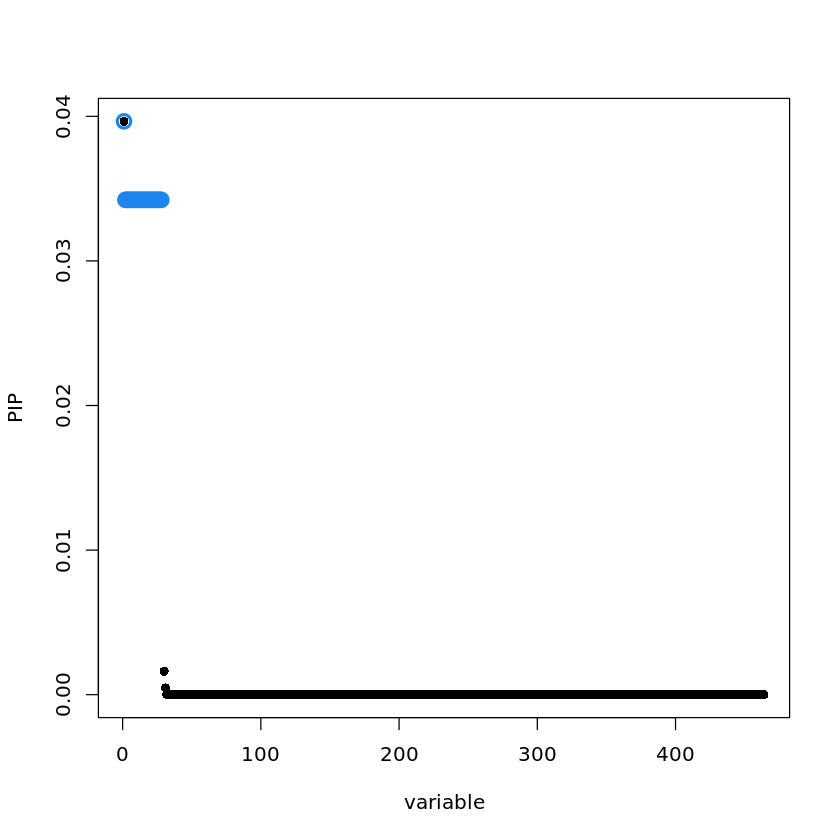

In [19]:
susie_plot(fitted_rss, y="PIP")

In [20]:
summary(fitted_rss)

,variable,variable_prob,cs
1,1,0.039654426,1
4,4,0.034223152,1
5,5,0.034223152,1
6,6,0.034223152,1
7,7,0.034223152,1
8,8,0.034223152,1
9,9,0.034223152,1
10,10,0.034223152,1
11,11,0.034223152,1
12,12,0.034223152,1


In [21]:
idx0 = summary(fitted_rss)$cs$variable
idx0
idx = as.integer(unlist(strsplit(idx0,",")))
str((idx))

[1] "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28"

 int [1:28] 1 2 3 4 5 6 7 8 9 10 ...


In [22]:
variants = as.character(df_rel$snp_id)[idx]
variants

[1] "22_25842620_G_A" "22_25845855_C_G" "22_25846015_A_C" "22_25846021_G_T"
 [5] "22_25846087_G_T" "22_25852155_G_A" "22_25852523_A_G" "22_25853368_T_C"
 [9] "22_25855204_A_G" "22_25855714_C_T" "22_25856231_C_T" "22_25856411_C_G"
[13] "22_25862124_G_A" "22_25862527_T_C" "22_25872592_A_C" "22_25872837_G_A"
[17] "22_25874464_G_A" "22_25874502_G_A" "22_25874580_A_C" "22_25875265_T_C"
[21] "22_25875573_C_T" "22_25875803_T_C" "22_25875988_T_G" "22_25878282_C_G"
[25] "22_25878614_G_A" "22_25879474_T_G" "22_25881013_T_A" "22_25885353_T_C"

In [23]:
# variants = as.character(df_rel$snp_id)[1:28]
# variants

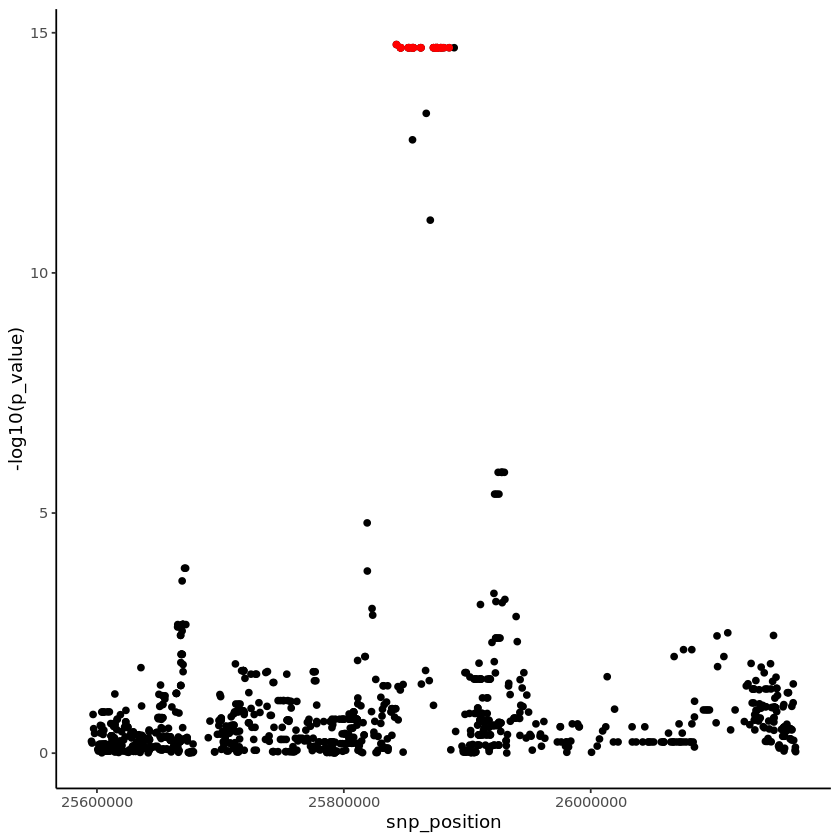

In [24]:
p = ggplot(df_rel, aes(x = snp_position, y = -log10(p_value))) + geom_point() 
p = p + geom_point(aes(x = snp_position, y = -log10(p_value)), data = df_rel[df_rel$snp_id %in% variants,], col = "red")
p + theme_classic()

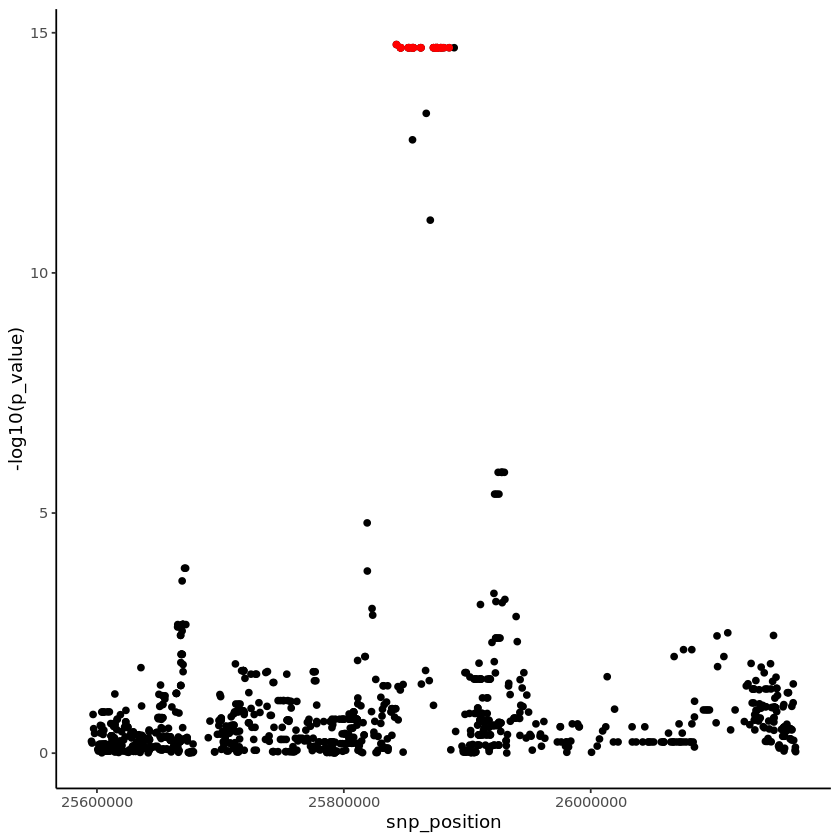

In [28]:
p = ggplot(df_rel, aes(x = snp_position, y = -log10(p_value))) + geom_point() 
p = p + geom_point(aes(x = snp_position, y = -log10(p_value)), data = df_rel[df_rel$snp_id %in% variants,], col = "red")
p + theme_classic()

In [56]:
common_snps = snps1[snps1 %in% snps2]
length(common_snps)

[1] 648

In [25]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"
y_df = read.csv(paste0(revision_folder,"example_y.csv"), row.names=1)
G_df = read.csv(paste0(revision_folder,"example_G.csv"), row.names=1)
C_df = read.csv(paste0(revision_folder,"example_C.csv"), row.names=1)

In [26]:
dim(y_df)
head(y_df,2)

[1] 33964     1

,ENSG00000211643_IGLV5.52
0,-0.1803445
1,-0.1803445


In [27]:
dim(G_df)
head(G_df,2)

[1] 33964   705

,X22_22573594_G_A,X22_22573611_T_C,X22_22573637_A_G,X22_22574284_G_A,X22_22574672_G_A,X22_22578624_C_T,X22_22579104_G_A,X22_22579105_C_T,X22_22579378_C_G,X22_22579483_C_A,...,X22_22746448_A_G,X22_22747327_C_T,X22_22747812_A_G,X22_22747908_C_T,X22_22748894_G_A,X22_22750684_C_T,X22_22751215_G_A,X22_22751970_G_A,X22_22753274_G_A,X22_22753426_G_A
0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,2,2,2,0,2,2
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,1,1


In [28]:
dim(C_df)
head(C_df,2)

[1] 33964    10

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10
0,-0.2269884,0.8291718,0.2341124,1.343998,0.5940033,0.30955839,-0.4349959,0.07390445,0.3087069,-0.6698875
1,0.1192853,2.9498052,0.8196344,1.203699,-0.3614824,-0.07383045,0.9517306,-0.32243650,1.8529516,-0.7023871


In [31]:
X = as.matrix(G_df)
y = as.matrix(y_df)
Z = as.matrix(C_df)

In [13]:
dim(X)
X_filt = X[ , colSums(is.na(X)) == 0]
dim(X_filt)

[1] 33964   705

[1] 33964   704

In [36]:
remove.covariate.effects <- function (X, Z, y) {
  # include the intercept term
  if (any(Z[,1]!=1)) Z = cbind(1, Z)
  A   <- forceSymmetric(crossprod(Z))
  SZy <- as.vector(solve(A,c(t(y) %*% Z)))
  SZX <- as.matrix(solve(A,t(Z) %*% X))
  y <- y - c(Z %*% SZy)
  X <- X - Z %*% SZX
  return(list(X = X,y = y,SZy = SZy,SZX = SZX))
}

out = remove.covariate.effects(X_filt, Z, y)
fitted_adjusted = susie(out$X, out$y,
               L = 10)

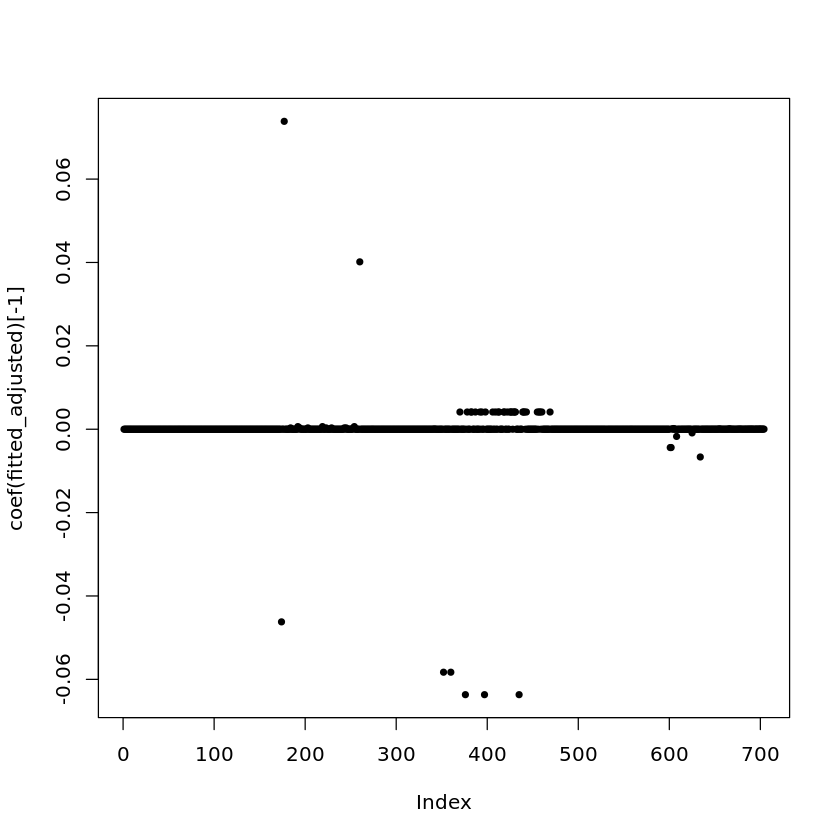

In [37]:
plot(coef(fitted_adjusted)[-1],pch = 20)

In [40]:
summary(res)

,variable,variable_prob,cs
475,475,1.00000000,5
372,372,0.99918167,8
477,477,0.99270142,3
260,260,0.71148687,9
352,352,0.50000138,6
360,360,0.50000138,6
267,267,0.47303675,7
286,286,0.47303675,7
376,376,0.33333511,2
397,397,0.33333511,2


In [39]:
summary(fitted_adjusted)

,variable,variable_prob,cs
177,177,1.00000000,2
174,174,0.99997901,5
260,260,0.87955136,7
352,352,0.50000475,4
360,360,0.50000475,4
376,376,0.33328760,3
397,397,0.33328760,3
435,435,0.33328760,3
634,634,0.32650043,-1
601,601,0.21906225,-1


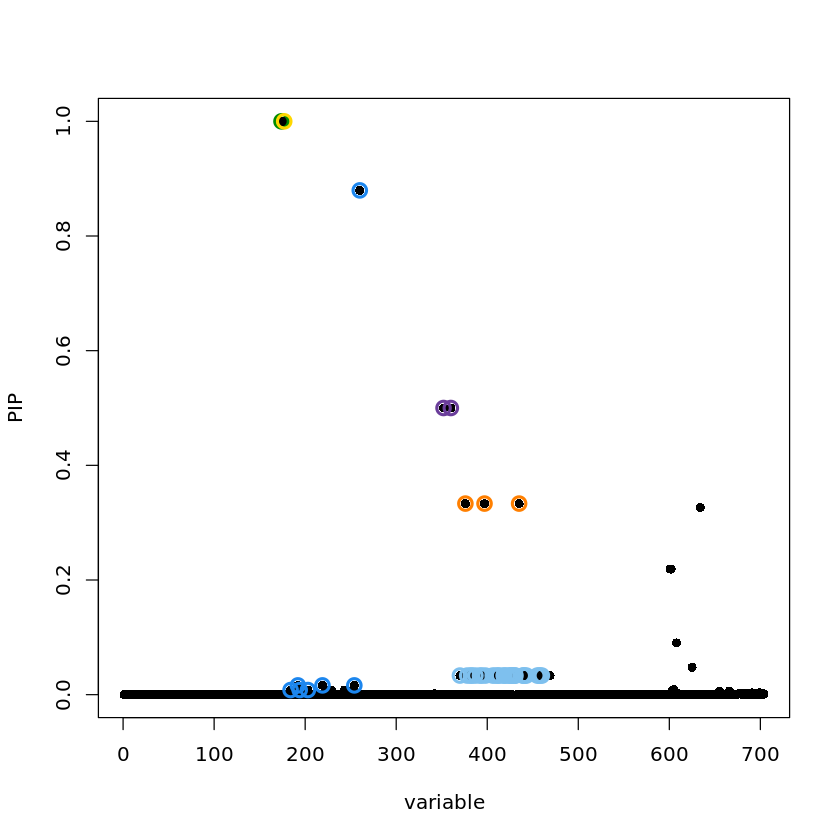

In [38]:
susie_plot(fitted_adjusted, y="PIP")

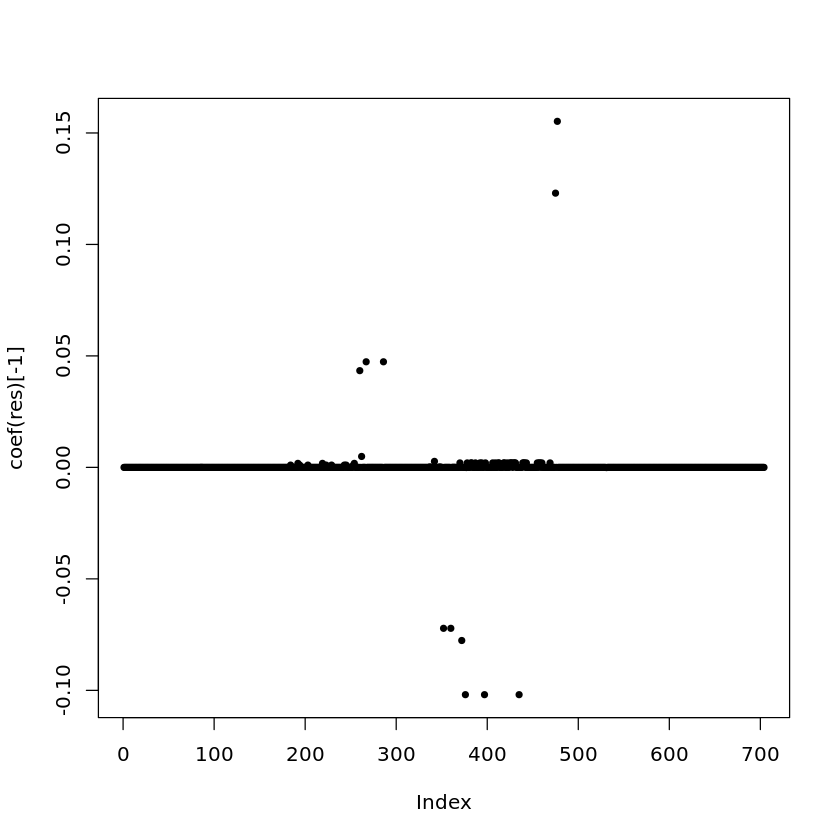

In [18]:
res <- susie(X_filt,y,L=20)
plot(coef(res)[-1],pch = 20)

In [23]:
print(res$sets)

$cs
$cs$L3
[1] 477

$cs$L5
[1] 475

$cs$L6
[1] 352 360

$cs$L8
[1] 372

$cs$L1
 [1] 370 378 382 383 387 392 394 398 406 409 412 413 418 419 422 425 426 427 429
[20] 430 439 440 441 443 455 457 458 460 469

$cs$L2
[1] 376 397 435

$cs$L7
[1] 262 267 286

$cs$L9
 [1] 184 192 194 203 219 223 229 243 254 260 342


$purity
   min.abs.corr mean.abs.corr median.abs.corr
L3    1.0000000     1.0000000       1.0000000
L5    1.0000000     1.0000000       1.0000000
L6    1.0000000     1.0000000       1.0000000
L8    1.0000000     1.0000000       1.0000000
L1    1.0000000     1.0000000       1.0000000
L2    1.0000000     1.0000000       1.0000000
L7    0.9649684     0.9844304       1.0000000
L9    0.8965220     0.9745208       0.9887251

$cs_index
[1] 3 5 6 8 1 2 7 9

$coverage
[1] 0.9927014 1.0000000 1.0000000 0.9991817 0.9655786 1.0000000 0.9951151
[8] 0.9632456

$requested_coverage
[1] 0.95



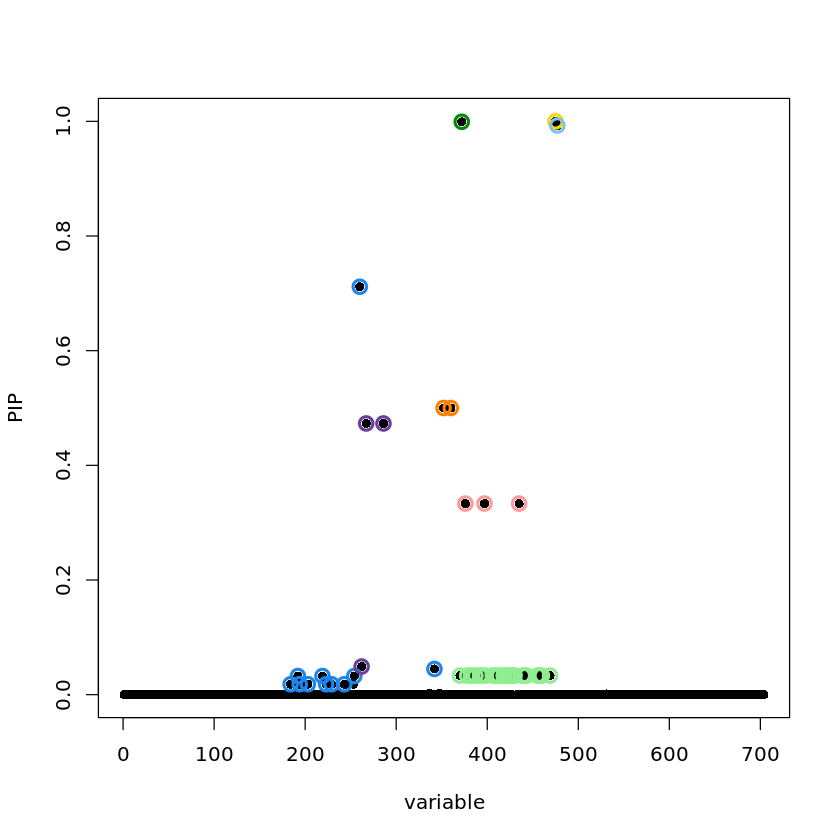

In [24]:
susie_plot(res, y="PIP")

In [28]:
library(qvalue)

In [25]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/Gtest_10MOFA/"

In [26]:
myfile = paste0(mydir,"results_mj/TestOut/top_qtl_results_all.txt")
df = read.csv(myfile, sep="\t")
nrow(df)
head(df,2)

[1] 11083

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
7_99442565_A_G,0.03640359,-0.19143557,0.09148769,0.9328839,7,99245817,99277621,27598,99,0.612032,52.19879,0.9,7,99442565,G,1,0.05050505,1,ENSG00000106258
7_99143503_A_T,0.02247299,-0.08541319,0.03742278,0.6305276,7,99214569,99230030,27598,99,1.121871,50.00241,0.8,7,99143503,T,1,0.07575758,1,ENSG00000197037


In [29]:
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
head(df,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
7_99442565_A_G,0.03640359,-0.19143557,0.09148769,0.9328839,7,99245817,99277621,27598,99,...,52.19879,0.9,7,99442565,G,1,0.05050505,1,ENSG00000106258,1
7_99143503_A_T,0.02247299,-0.08541319,0.03742278,0.6305276,7,99214569,99230030,27598,99,...,50.00241,0.8,7,99143503,T,1,0.07575758,1,ENSG00000197037,1


In [30]:
write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/Marcs_results_qvalue.csv")

In [31]:
head(df0)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000221909,7_99141373_G_A,0.0288737,0.05597193,0.02561291,0.4631133,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99141373,A,1,0.07575758,0.4360553
ENSG00000221909,7_99024636_C_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99024636,T,1,0.10606061,0.5939258
ENSG00000221909,7_99030782_A_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99030782,T,1,0.10606061,0.5939258
ENSG00000221909,7_99032593_G_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99032593,T,1,0.10606061,0.5939258
ENSG00000221909,7_99034055_G_A,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99034055,A,1,0.10606061,0.5939258
ENSG00000221909,7_99035211_C_A,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99035211,A,1,0.10606061,0.5939258


In [32]:
nrow(df0)

[1] 19131741

In [37]:
df0$eqtl = paste0(df0$feature_id,"-",df0$snp_id)
df1 = df0[-which(duplicated(df0$eqtl)),]
nrow(df1)
head(df1)

[1] 11644600

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,eqtl
ENSG00000221909,7_99141373_G_A,0.0288737,0.05597193,0.02561291,0.4631133,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99141373,A,1,0.07575758,0.4360553,ENSG00000221909-7_99141373_G_A
ENSG00000221909,7_99024636_C_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99024636,T,1,0.10606061,0.5939258,ENSG00000221909-7_99024636_C_T
ENSG00000221909,7_99030782_A_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99030782,T,1,0.10606061,0.5939258,ENSG00000221909-7_99030782_A_T
ENSG00000221909,7_99032593_G_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99032593,T,1,0.10606061,0.5939258,ENSG00000221909-7_99032593_G_T
ENSG00000221909,7_99034055_G_A,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99034055,A,1,0.10606061,0.5939258,ENSG00000221909-7_99034055_G_A
ENSG00000221909,7_99035211_C_A,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99035211,A,1,0.10606061,0.5939258,ENSG00000221909-7_99035211_C_A


In [38]:
write.csv(df1, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/Marcs_results_all.csv")

In [34]:
19131741/2

[1] 9565870

In [25]:
p_star = max(df[df$q_value<0.01,"empirical_feature_p_value"])
p_star

[1] 0.00120036

In [36]:
myfile0 = paste0(mydir,"results_mj/TestOut/qtl_results_all.txt.gz")
df0 = read.csv(gzfile(myfile0), sep="\t")
nrow(df0)
head(df0,2)

[1] 19131741

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000221909,7_99141373_G_A,0.0288737,0.05597193,0.02561291,0.4631133,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99141373,A,1,0.07575758,0.4360553
ENSG00000221909,7_99024636_C_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,99,0.964815,20.15266,0.8,7,99024636,T,1,0.10606061,0.5939258


In [18]:
nrow(df0[df0$empirical_feature_p_value < 5e-8,])

[1] 76599

In [26]:
df1 = df0[df0$feature_id %in% unique(df[df$q_value<0.01,"feature_id"]),]
nrow(df1)

[1] 2479572

In [27]:
df2 = df1[df1$empirical_feature_p_value < p_star,]
nrow(df2)
head(df2)

[1] 188525

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
3975,ENSG00000142188,21_34809049_T_A,1.475969e-10,-0.1376768,0.02147770,4.025294e-05,21,34804792,34852318,27598,99,0.573433,120.0599,0.8,21,34809049,A,1,0.4646465,0.5456738
3976,ENSG00000142188,21_34786574_G_A,1.893471e-10,0.1372848,0.02154474,4.643360e-05,21,34804792,34852318,27598,99,0.573433,120.0599,0.8,21,34786574,A,1,0.4747475,0.5458128
3977,ENSG00000142188,21_34793588_A_G,1.893471e-10,0.1372848,0.02154474,4.643360e-05,21,34804792,34852318,27598,99,0.573433,120.0599,0.8,21,34793588,G,1,0.4747475,0.5458128
3978,ENSG00000142188,21_34793706_C_T,1.893471e-10,0.1372848,0.02154474,4.643360e-05,21,34804792,34852318,27598,99,0.573433,120.0599,0.8,21,34793706,T,1,0.4747475,0.5458128
3979,ENSG00000142188,21_34796886_A_G,1.893471e-10,0.1372848,0.02154474,4.643360e-05,21,34804792,34852318,27598,99,0.573433,120.0599,0.8,21,34796886,G,1,0.4747475,0.5458128
3980,ENSG00000142188,21_34785672_G_T,1.936001e-10,-0.1385331,0.02175228,4.702885e-05,21,34804792,34852318,27598,99,0.573433,120.0599,0.8,21,34785672,T,1,0.4696970,0.6871524


In [28]:
length(unique(df2$feature_id))

[1] 1281

In [24]:
for (gene in unique(df2$feature_id)){
    print(nrow(df2[df2$feature_id == gene,]))
}

[1] 162
[1] 84
[1] 9
[1] 2
[1] 210
[1] 6
[1] 2
[1] 12
[1] 888
[1] 16
[1] 130
[1] 156
[1] 388
[1] 70
[1] 96
[1] 14
[1] 372
[1] 6
[1] 8
[1] 6
[1] 20
[1] 70
[1] 8
[1] 714
[1] 16
[1] 60
[1] 4
[1] 26
[1] 158
[1] 60
[1] 472
[1] 374
[1] 4
[1] 8
[1] 26
[1] 4
[1] 852
[1] 3
[1] 3
[1] 4
[1] 2
[1] 44
[1] 300
[1] 2
[1] 38
[1] 6
[1] 162
[1] 42
[1] 102
[1] 150
[1] 2
[1] 16
[1] 680
[1] 8
[1] 6
[1] 2
[1] 658
[1] 506
[1] 8
[1] 40
[1] 2
[1] 12
[1] 4
[1] 2
[1] 2
[1] 388
[1] 16
[1] 10
[1] 6
[1] 52
[1] 28
[1] 12
[1] 28
[1] 150
[1] 4
[1] 30
[1] 528
[1] 2
[1] 438
[1] 282
[1] 2
[1] 138
[1] 26
[1] 2
[1] 42
[1] 20
[1] 700
[1] 6
[1] 418
[1] 34
[1] 2
[1] 8
[1] 78
[1] 102
[1] 226
[1] 2
[1] 4
[1] 16
[1] 66
[1] 408
[1] 80
[1] 96
[1] 4
[1] 22
[1] 4
[1] 372
[1] 4
[1] 104
[1] 48
[1] 414
[1] 152
[1] 318
[1] 50
[1] 990
[1] 666
[1] 144
[1] 2
[1] 16
[1] 2
[1] 2
[1] 288
[1] 252
[1] 2
[1] 380
[1] 4
[1] 70
[1] 162
[1] 2
[1] 12
[1] 358
[1] 4
[1] 36
[1] 280
[1] 4
[1] 12
[1] 138
[1] 64
[1] 22
[1] 2
[1] 2
[1] 168
[1] 566
[1] 252
[